In [1]:
"""
Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). 
Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
"""

'\nUse the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). \nUse the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).\n'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [3]:
breast = load_breast_cancer()

#Add target column 
labels = np.reshape(breast.target,(569,1))
#set data = data + target
final_breast_data = np.concatenate([breast.data,labels],axis=1)
#create data frame using data
df = pd.DataFrame(final_breast_data) 

In [4]:
#add column names to data frame
features = breast.feature_names 
features_labels = np.append(features,'label')
df.columns = features_labels

In [16]:
accuracy_history = np.zeros(30)
precision_history = np.zeros(30)
recall_history = np.zeros(30)
for k in range(1, 30):
    x = df.loc[:, features].values 
    # Separating out the target 
    y = df.loc[:,['label']].values.ravel()
    # Standardizing the features 
    x_scaled = StandardScaler().fit_transform(x) 
    
    #Apply pca
    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(x_scaled) 
    principalDf = pd.DataFrame(data = principalComponents) 
    
    #split set into training(0.8) and validations(0.2) sets
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, y, test_size = 0.2)
    
    model = SVC(kernel='rbf', C=1)
    model.fit(X_train, Y_train)

    #Apply the model to the validation set
    Y_pred = model.predict(X_test)
    
    #add acccuracy, precision, and recall to their history 
    accuracy_history[k] = metrics.accuracy_score(Y_test, Y_pred)
    precision_history[k] = metrics.precision_score(Y_test, Y_pred)
    recall_history[k] = metrics.recall_score(Y_test, Y_pred)
    
    print("Accuracy K = ", k , "is ", accuracy_history[k])

Accuracy K =  1 is  0.9473684210526315
Accuracy K =  2 is  0.9473684210526315
Accuracy K =  3 is  0.9298245614035088
Accuracy K =  4 is  0.9736842105263158
Accuracy K =  5 is  0.9473684210526315
Accuracy K =  6 is  0.9649122807017544
Accuracy K =  7 is  0.9736842105263158
Accuracy K =  8 is  0.9736842105263158
Accuracy K =  9 is  0.9649122807017544
Accuracy K =  10 is  0.956140350877193
Accuracy K =  11 is  0.9385964912280702
Accuracy K =  12 is  0.9912280701754386
Accuracy K =  13 is  0.9736842105263158
Accuracy K =  14 is  1.0
Accuracy K =  15 is  0.9736842105263158
Accuracy K =  16 is  0.9824561403508771
Accuracy K =  17 is  0.9824561403508771
Accuracy K =  18 is  0.9736842105263158
Accuracy K =  19 is  0.9736842105263158
Accuracy K =  20 is  0.9473684210526315
Accuracy K =  21 is  0.9736842105263158
Accuracy K =  22 is  0.9824561403508771
Accuracy K =  23 is  0.9473684210526315
Accuracy K =  24 is  0.9473684210526315
Accuracy K =  25 is  0.9912280701754386
Accuracy K =  26 is  0.97

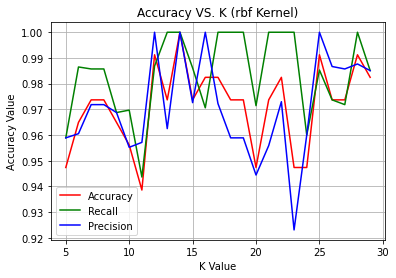

In [17]:
#graph accuracy
plt.plot(range(5, 30),accuracy_history[5:30] , color='red', label='Accuracy')
plt.plot(range(5, 30),recall_history[5:30], color='green', label='Recall') #plot recall
plt.plot(range(5, 30),precision_history[5:30], color='blue', label='Precision') 
#plt.rcParams["figure.figsize"] = (1,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Accuracy Value') 
plt.title('Accuracy VS. K (rbf Kernel)') 
plt.legend()